In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

#import time library and the datetime module
import time
from datetime import datetime

#import requests and api key
import requests
from config import weather_api_key

In [2]:
#create a set  of random lat and long combos
#-------------------------CHANGE SIZE TO 1500 BEFORE SUBMISSION----------------------------
lats = np.random.uniform(low=-90.000,high=90.000,size=100)
lngs = np.random.uniform(low=-90.000,high=90.000,size=100)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)

In [4]:
#get lat and long combo in sets
for coordinate in coordinates:
    print(coordinate[0],coordinate[1])

-56.084176064759426 -82.0827757219533
-4.401061216442926 36.85453296621532
30.509095606219645 69.44449053907655
-29.068911986387015 -53.28130237018025
18.412701462042875 -89.34396956073833
2.181228214775217 -24.70977511701723
23.280687793972575 -59.73016519101118
69.59304833933714 19.590399265288795
15.37402425469034 -22.672127782827488
2.1073045007595823 62.09078642941853
47.43861033629619 20.750911510184153
15.6983067325545 -37.273430819648695
-22.744469724575737 -22.31212321670516
19.925200285039736 -80.40524400876994
23.414232435841242 71.63136339882001
-28.850982039997398 -25.954908940935482
83.68649819757107 -13.343902670219492
-20.73672648839198 50.528535404972274
-45.65016370577538 67.68948488275248
-74.14978347580532 -5.566977369797627
-9.721986968361179 10.572489974631324
65.33526635621959 -15.583571480139625
-77.17140073172861 55.36395036174076
-32.724930905300695 -18.308436266139395
-65.85951767037149 61.65587633227568
-79.3939457946981 52.995554760038004
54.59831270280816 

In [5]:
#create list for holding the cities
cities = []

#identify nearest city for each lat and long combo

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    #if city is unique, add to list
    if city not in cities:
        cities.append(city)
        
#print city count and confirm sufficiency
len(cities)

78

In [6]:
#build the url
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + weather_api_key

#create list for holding the cities
city_data = []

#print beginning of logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#create counters
record_count = 1
set_count = 1

#NOTA BENE: we need to iterate through our list of cities and begin building the URL for each city, while grouping our records in sets of 50.
#o do this, use for i in range(len(cities)) and the index to tell us when we get to 50. Once we get to 50, we tell the program to pause for 60 seconds using the time.sleep(60) command. The OpenWeatherMap API only allows 60 calls for per minute on their free tier, so pausing our program for one minute after each set of 50 will prevent time-out errors. We can also retrieve the city from the cities list and add it to the city_url by using indexing,
#as shown in the following code:

#loop through all cities in our list
for i,city in enumerate (cities):
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count +=1
        record_count = 1
        time.sleep(60)
        
    #create endpoint url for each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    #log the url, record and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    #add 1 to record count
    record_count +=1

    #run api request for each city
    try:
        #parse json and retrieve data
        city_weather = requests.get(city_url).json()

        #parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]

        #convert data in ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        #append city data to city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    #if error occur, skip city
    except:
        print("City not found. Skipping...")
        pass

#indicate data loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | naberera
Processing Record 3 of Set 1 | barkhan
Processing Record 4 of Set 1 | sobradinho
Processing Record 5 of Set 1 | nicolas bravo
Processing Record 6 of Set 1 | bubaque
Processing Record 7 of Set 1 | codrington
Processing Record 8 of Set 1 | storsteinnes
Processing Record 9 of Set 1 | vila do maio
Processing Record 10 of Set 1 | victoria
Processing Record 11 of Set 1 | tiszaszentimre
Processing Record 12 of Set 1 | ponta do sol
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | bodden town
Processing Record 15 of Set 1 | mandal
Processing Record 16 of Set 1 | vila velha
Processing Record 17 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 1 | mahanoro
Processing Record 19 of Set 1 | saint-philippe
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | luanda
Processing Re

In [7]:
len(city_data)

71

In [8]:
#convert array of dictionaries to Pandas DF
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,11.06,40,0,4.63,CL,2022-10-02 19:39:21
1,Naberera,-4.2000,36.9333,16.57,65,87,5.45,TZ,2022-10-02 19:43:07
2,Barkhan,29.8977,69.5256,23.69,40,0,1.77,PK,2022-10-02 19:43:08
3,Sobradinho,-12.8333,-39.1000,25.30,71,29,3.80,BR,2022-10-02 19:43:08
4,Nicolas Bravo,18.4500,-88.9167,33.49,37,94,0.40,MX,2022-10-02 19:43:08
5,Bubaque,11.2833,-15.8333,27.43,76,64,3.73,GW,2022-10-02 19:43:09
6,Codrington,-38.2667,141.9667,7.66,89,100,1.92,AU,2022-10-02 19:39:24
7,Storsteinnes,69.2408,19.2344,3.54,80,34,0.78,NO,2022-10-02 19:43:09
8,Vila Do Maio,15.1333,-23.2167,27.44,69,18,5.46,CV,2022-10-02 19:43:09
9,Victoria,22.2855,114.1577,28.51,84,13,1.34,HK,2022-10-02 19:38:08


In [9]:
#re-arrange the column headers
new_col_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_col_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2022-10-02 19:39:21,-53.1500,-70.9167,11.06,40,0,4.63
1,Naberera,TZ,2022-10-02 19:43:07,-4.2000,36.9333,16.57,65,87,5.45
2,Barkhan,PK,2022-10-02 19:43:08,29.8977,69.5256,23.69,40,0,1.77
3,Sobradinho,BR,2022-10-02 19:43:08,-12.8333,-39.1000,25.30,71,29,3.80
4,Nicolas Bravo,MX,2022-10-02 19:43:08,18.4500,-88.9167,33.49,37,94,0.40
5,Bubaque,GW,2022-10-02 19:43:09,11.2833,-15.8333,27.43,76,64,3.73
6,Codrington,AU,2022-10-02 19:39:24,-38.2667,141.9667,7.66,89,100,1.92
7,Storsteinnes,NO,2022-10-02 19:43:09,69.2408,19.2344,3.54,80,34,0.78
8,Vila Do Maio,CV,2022-10-02 19:43:09,15.1333,-23.2167,27.44,69,18,5.46
9,Victoria,HK,2022-10-02 19:38:08,22.2855,114.1577,28.51,84,13,1.34


In [10]:
#create the output csv file
output_data_file = "weather_data\cities.csv"

#export the city_data into the csv
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [11]:
#extract relevant fields from the Dframe for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

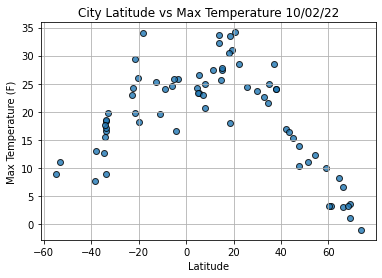

In [13]:
#import time module
import time

#build scatter plot for lat vs max temp
plt.scatter(lats,
           max_temps,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the image
plt.savefig("weather_data\Fig1.png")

#display the chart
plt.show()

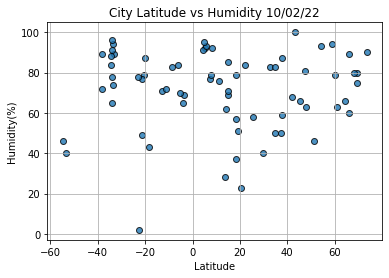

In [15]:
#import time module
import time

#build scatter plot for lat vs humidity
plt.scatter(lats,
           humidity,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs Humidity " + time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the image
plt.savefig("weather_data\Fig2.png")

#display the chart
plt.show()

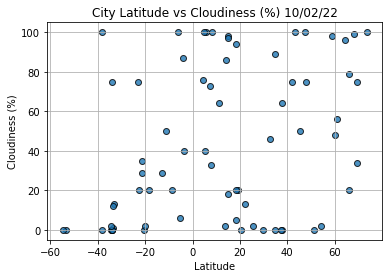

In [16]:
#build scatter plot for lat vs cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the image
plt.savefig("weather_data\Fig3.png")

#display the chart
plt.show()

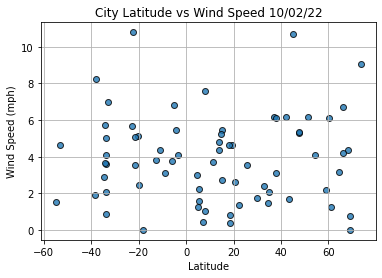

In [17]:
#build scatter plot for lat vs wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#save the image
plt.savefig("weather_data\Fig4.png")

#display the chart
plt.show()